# Введение в глубокое обучение

## Занятие 5. Transfer Learning.

План занятия: 

1. Популярные архитектуры нейросетей
2. Transfer Learning

## Архитектуры нейросетей

На прошлом занятии мы познакомились с принципом работы сверточных нейросетей, которые хорошо подходят для работы с изображениями. На этом занятии мы познакомимся с популярными архитектурами сверточных нейросетей.  

Для начала пару слов о том, **зачем вообще нужно разбирать конкретные архитектуры сверточных сетей**. 

Когда исследователи хотят решить какую-нибудь задачу с помощью нейросети, часто они не пишут свою нейросеть с нуля, а берут какую-то из стандартных архитектур, типа ResNet или DenseNet, и обучают ее под свою задачу. Это очень удобно: данные архитектуры доказали, что они эффективно решают задачу классификации, и вместо того, чтобы самому настраивать архитектуру (количество слоев, количество фильтров в слоях, куда поставить пулинг, и т.д.), можно вместо этого взять готовую удачную архитектуру, например, ResNet, и обучить ее. 

То, какую архитектуру из всех выбрать, зависит от типа вашей задачи и от того, насколько задача сложная и сколько у вас данных для обучения. Чем меньше у вас данных и чем проще ваша задача, тем более легкую, менее глубокую сеть вам нужно взять, чтобы она не переобучилась. Например, для классификации картинок MNIST или CIFAR подойдет и самая простая сеть AlexNet. Если же ваша задача сложная, то есть, у вас картинки сложных различных форм и много различных классов, как в ImageNet, то вам понадобится нейросеть с большим количеством слоев. 

Кроме того, различные архитектуры используют разные дополнительные трюки для улучшения эффективности работы сети. О них полезно знать, чтобы выбрать правильную архитектуру под свою задачу. 

И прежде чем начать разговор об архитектурах нейросетей, давайте поговорим про ImageNet. 

### ImageNet

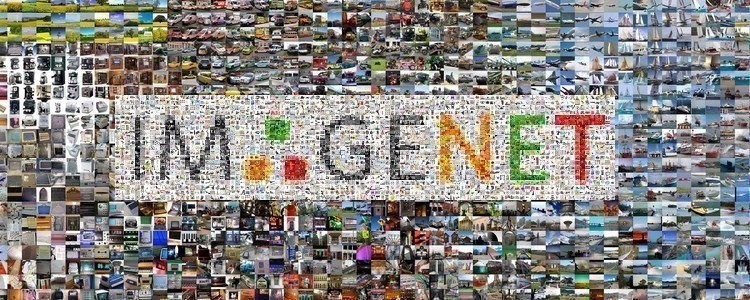

[ImageNet](http://www.image-net.org) — это база данных изображений, поделенных на большое количество классов. То есть, это датасет, на котором можно решать задачу классификации картинок. У ImageNet есть две версии:
- более старая версия: 1,000 классов, 1,431,167 изображений (1,281,167/50,000/100,000 train/val/test)
- более новая версия: 21,000 классов, 14,197,122 изображений 

В 2010 году на основе версии ImageNet-1k был запущен конкурс классификации картинок. Участники должны были обучать модели машинного обучения на тренировочной части из ImageNet и получать предсказания на тестовой. Решения оценивались по метрике accuracy. 

Таймлайн конкурса:


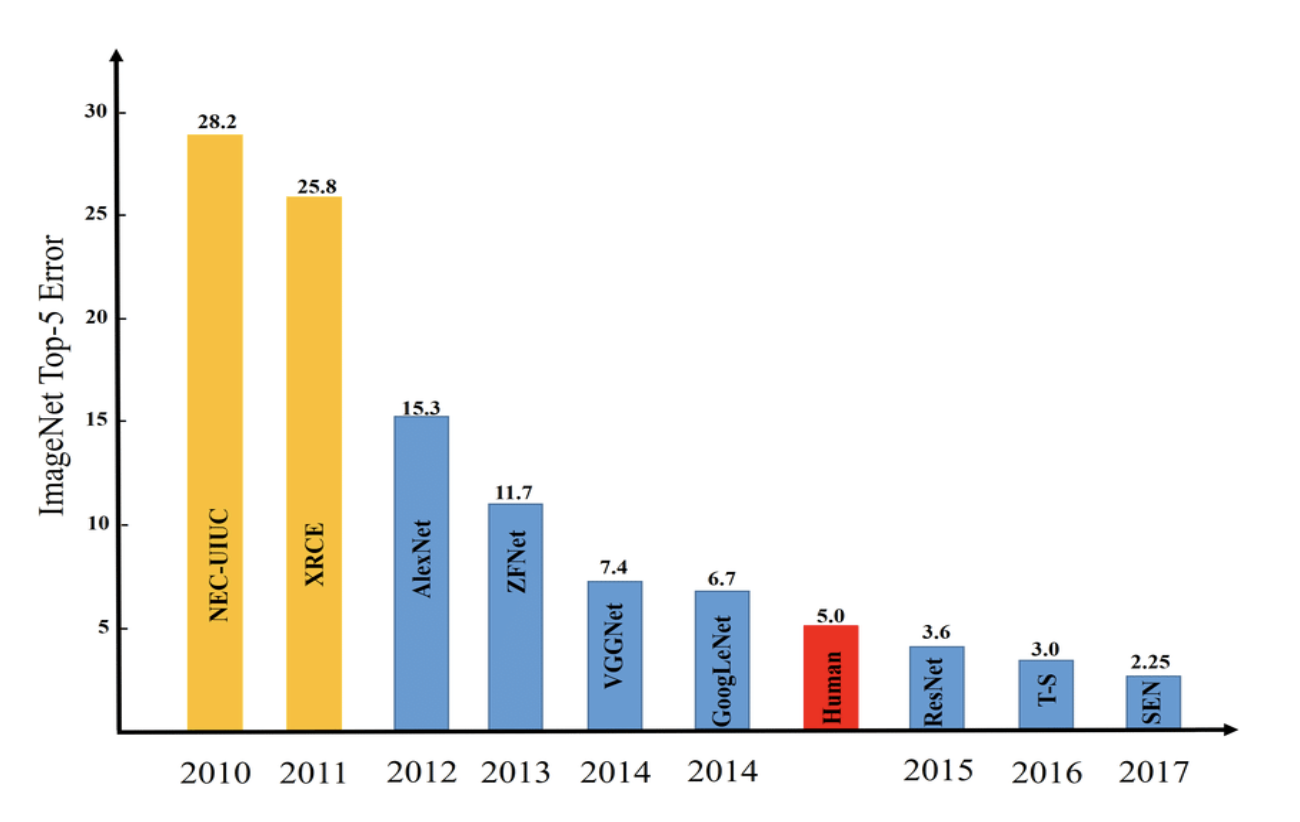

### Архитектуры нейросетей

Кратко обсудим архитектуры с таймлайна (и еще парочку тех, которых на таймлайне нет)

- **NEC-UIUC, XRCE** — не нейронные модели. Они основаны на идеях классического машинного обучения;
- **AlexNet** — первая сверточная нейросеть, показавшая отличный результат на ImageNet. Этот момент принято считать революцией в глубоком обучении: тогда люди поверили, что нейросети могут успешно применяться для обработки картинок. AlexNet имеет довольно простую архитектуру, состоящую из известных нам элементов: conv, relu, fc, bachnorm, dropout;
- **ZFNet, VGG** — также обычные сверточные нейросети, но более глубокие, чем AlexNet;

Успех VGG по сравнению с AlexNet во многом был связан с тем, что у VGG стало больше сверточных слоев. Это логично: больше слоев и, как следствие, параметров сети позволяет модели лучше подстраиваться под сложные зависимости в данных. И после успеха VGG люди стали пробовать и далее увеличивать количество слоев сети в надежде, что нейросеть станет работать еще лучше. 

Но, оказалось, все не так просто: если у нейросети становится слишком большое количество слоев, сеть начинает учиться хуже. Возникает **проблема затухания градиентов**. 

Подробно про проблему затухания градиентов можно узнать в [этом видео ](https://www.youtube.com/watch?v=TcUPuKpIlhQ&list=PL0Ks75aof3Tiru-UvOvYmXzD1tU0NrR8V&index=44)

Мы не будем подробно разбирать суть проблемы затухания градиентов и все способы ее решения, но упомянем один: skip connection. 

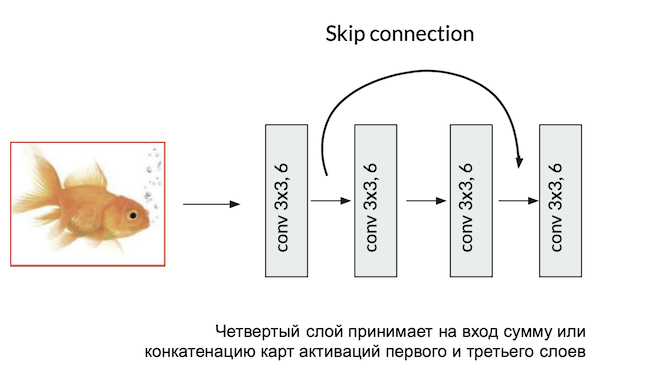

**Skip connection** — это добавление дополнительных связей между непоследовательными слоями сети. 

В примере на картинке выше дополнительная связь добавлена от первого к четвертому слою сети. Четвертый слой принимает на вход сумму или конкатенацию карт активаций 1 и 3 слоев. 

Добавление skip connection в сеть позволяет создавать нейросети с большим количеством слоев:

- **ResNet**: сверточная сеть + skip connection (сложение карт активаций);
- **DenseNet**: сверточная сеть + skip connection (конкатенация карт активаций);

Вот схематичное устройство ResNet-34 (версии ResNet, у которой 34 слоя):

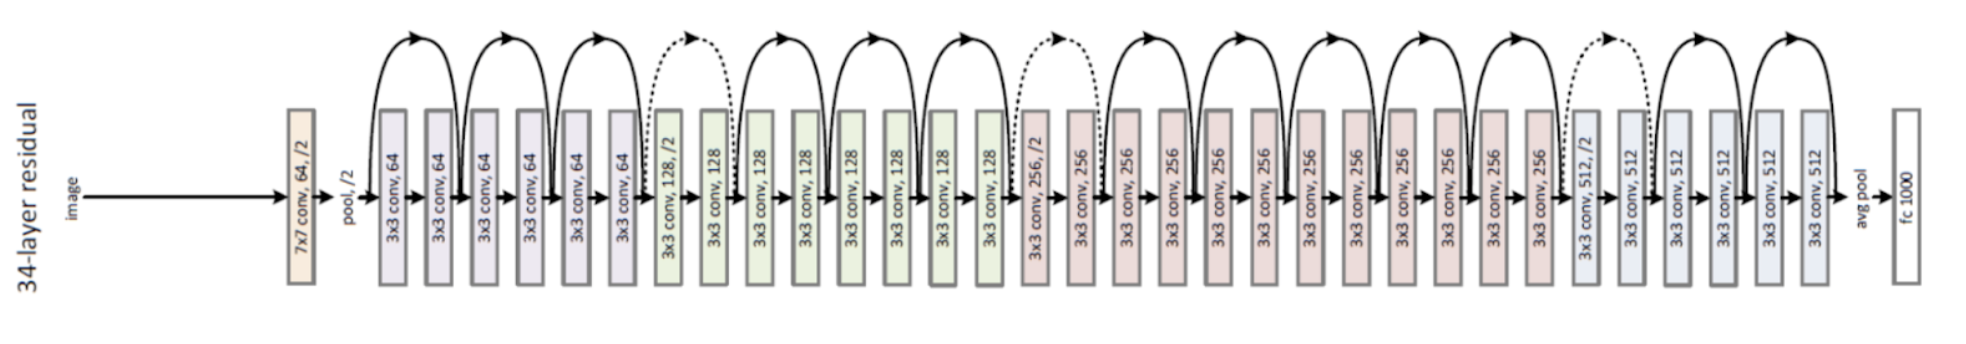

Кроме skip connection есть еще много трюков для улучшения эффективности работы нейросетей. Некоторые из трюков заточены под конкретные задачи, некоторые призваны в целом улучшить процесс обработки изображения нейросетью. 

Примеры других архитектур: 
- **Inception** (GoogLeNet);

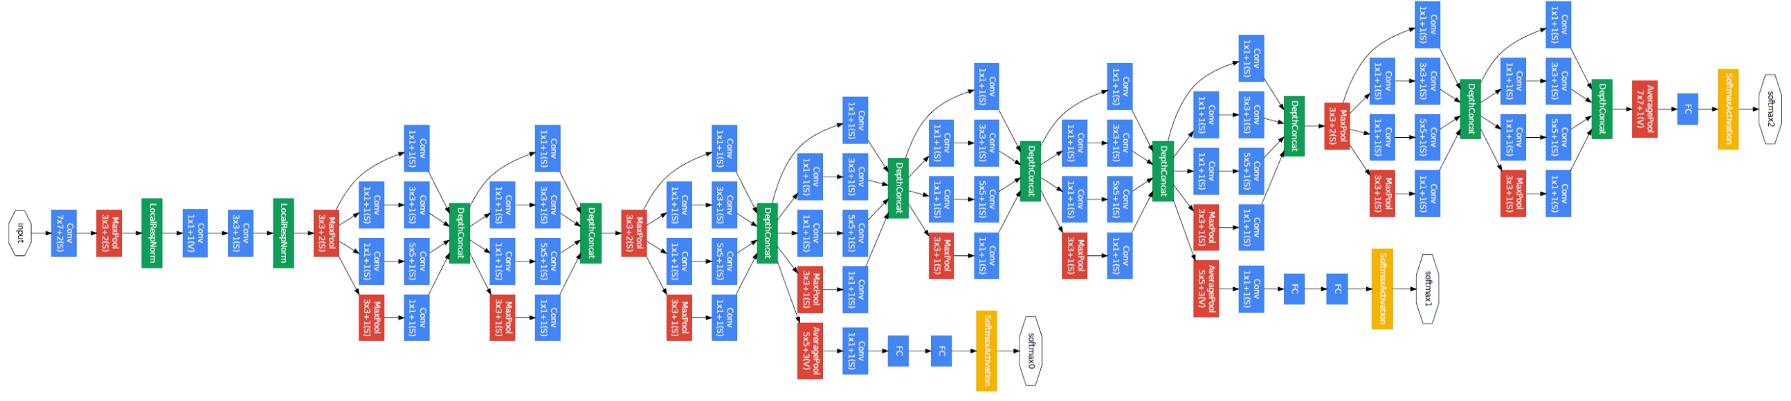

- **MobileNet**: легковесная архитектура, подобранная для использования на мобильных устройствах;
- **ResNeXt**, **ShuffleNet**, ...

Архитектуры, доступные в torchvision, [можно найти тут](https://pytorch.org/vision/0.8/models.html).

У многих архитектур есть версии. Например: 
- VGG-13, -16, -19;
- ResNet-18, -34, -50, 154, ...

Версии чаще всего отличаются количеством слоев (и, как следствие, параметров).

### Практика

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

#### Загрузка модели из torchvision

In [ ]:
# модель resnet-18
model = models.resnet18(pretrained=True)

In [ ]:
model

Чтобы использовать предобученную сеть resnet18 наиболее эффективно, нужно все изображения, которые мы подаем ей на вход, предобрабатывать определенным образом. Для всех сетей семейства resnet есть свои фиксированные преобразования:

In [ ]:
resnet_transforms = transforms.Compose([
        transforms.Resize(256), # размер каждой картинки будет приведен к 256*256
        transforms.CenterCrop(224), # у картинки будет вырезан центральный кусок размера 224*224
        transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # значения пикселей картинки нормализуются
    ])

# можно самому не писать преобразования, а просто взять их из models:
# resnet_transforms = models.ResNet18_Weights.IMAGENET1K_V1.transforms()

#### Тест предобученной сети на одной картинке

Загрузим картинку песика из интернета:

In [ ]:
! wget "https://ichef.bbci.co.uk/news/640/cpsprodpb/475B/production/_98776281_gettyimages-521697453.jpg" -O "doggie.jpg"

Посмотрим на картинку:

In [ ]:
from PIL import Image

image = Image.open('doggie.jpg')
image

Применим трансформации к картинке и посмотрим, как она будет после этого выглядеть:

In [ ]:
image_transformed = resnet_transforms(image)
print(image_transformed.shape)

In [ ]:
plt.imshow(image_transformed.permute(1,2,0).data.cpu().numpy())

Подадим картинку на вход сети и получим ответ:

In [ ]:
model.eval()

with torch.no_grad():
    # image_transformed -> [image_transformed]
    model_output = model(image_transformed.reshape((1, 3, 224, 224)))

model_output

Получим ответ сети на картинку. Соотношения номеров классов и названий можно посмотреть тут: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [ ]:
np.argmax(model_output.data.cpu().numpy())

## Transfer Learning

Сейчас мы обсудим такую вещь, как Transfer Learning. Transfer Learning переводится как перенос знаний. Мы узнаем, что это такое и как transfer learning применяется для обучения нейросетей.



**Проблема, которую Transfer learning помогает решить:**

Мы знаем, что когда в обучающем датасете мало данных, нейросети часто переобучаются. Особенно это верно, когда задача сложная. Пример такой задачи — классификация изображений опухолей. В медицине данных для обучения нейросетей всегда очень мало: их очень сложно собрать. Но задача при этом довольно сложная: опухоли бывают совершенно разных форм и размеров. 

Другой пример сложной задачи, для которой очень непросто собрать достаточно данных — машинный перевод с малораспространенных языков. Чтобы обучить модель для машинного перевода с одного языка на другой, нужно огромное количество параллельных предложений. Параллельные предложения — это пары: предложение на одном языке, и его точный перевод на второй язык. Чаще всего такие предложения собираются из интернета. Например, из Википедии, в которой одна и та же статья часто переведена на много разных языков. 

Но если язык не сильно распространен, то и текстов в интернете на нем будет немного. И достаточное количество предложений на этом языке и их переводов на другой язык набрать не получится. 

Вот такая частая проблема. Она возникает повсеместно, не только в медицинском домене и машинном переводе. Задачи машинного обучения становятся все сложнее, нейросети для их решения становятся все глубже, и это требует все большего числа данных для обучения. Короче говоря, в машинном обучении данных всегда мало.

И один из способов бороться с этой проблемой — это transfer learning. Перенос знаний от одной модели машинного обучения к другой. Один из самых простых подходов к transfer learning — дообучение. 



### Дообучение сети

Дообучение работает довольно просто:

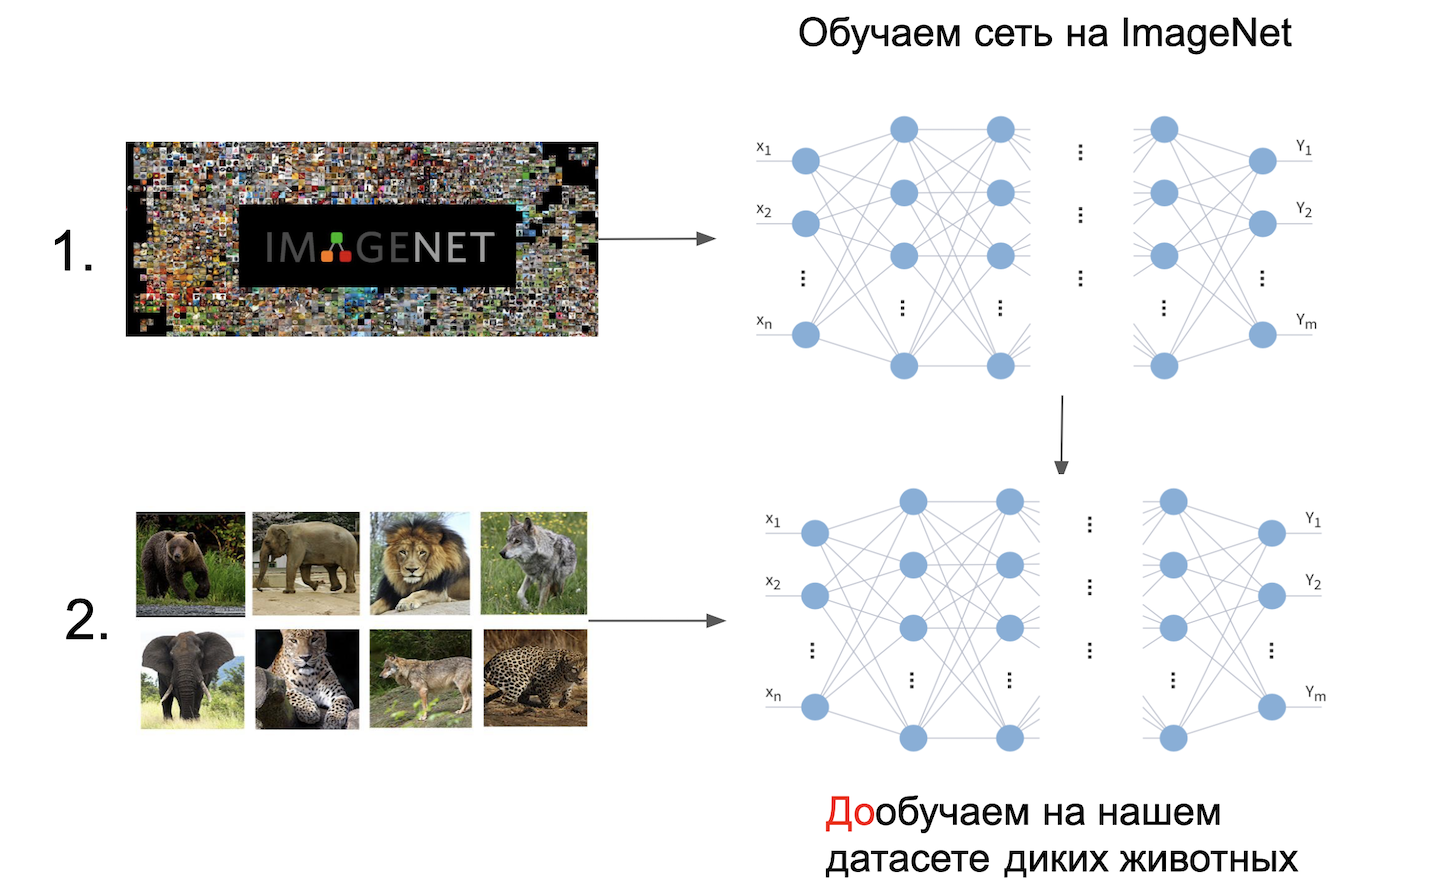

1. Обучаем сеть на ImageNet (или на другом большом датасете) с нуля.
2. Дообучаем сеть на нужном нам датасете.

ImageNet — это, чаще всего, отличный датасет для предобучения. Он содержит огромное количество разных классов и форм, поэтому в процессе обучения на нем нейросеть выучивает фильтры, которые реагируют на самые разные паттерны на картинках. Она как бы "что-то понимает о том, как устроены объекты окружающего мира". Это затем помогает сети лучше подстроиться под классификацию новых объектов нового датасета, даже если в новом датасете не так много картинок. 



Здесь, однако, есть один нюанс: чаще всего датасет для дообучения содержит иное количество классов, чем ImageNet. А количество классов в датасете влияет на то, сколько нейронов должно быть в последнем слое сети. 

Эта проблема решается довольно просто: перед дообучением выкинем последний слой сети и заменим его на новый, в котором будет нужное количество нейронов. Веса этого слоя перед дообучением будут случайными, они будут обучаться вместе со всей нейросетью в процессе дообучения.

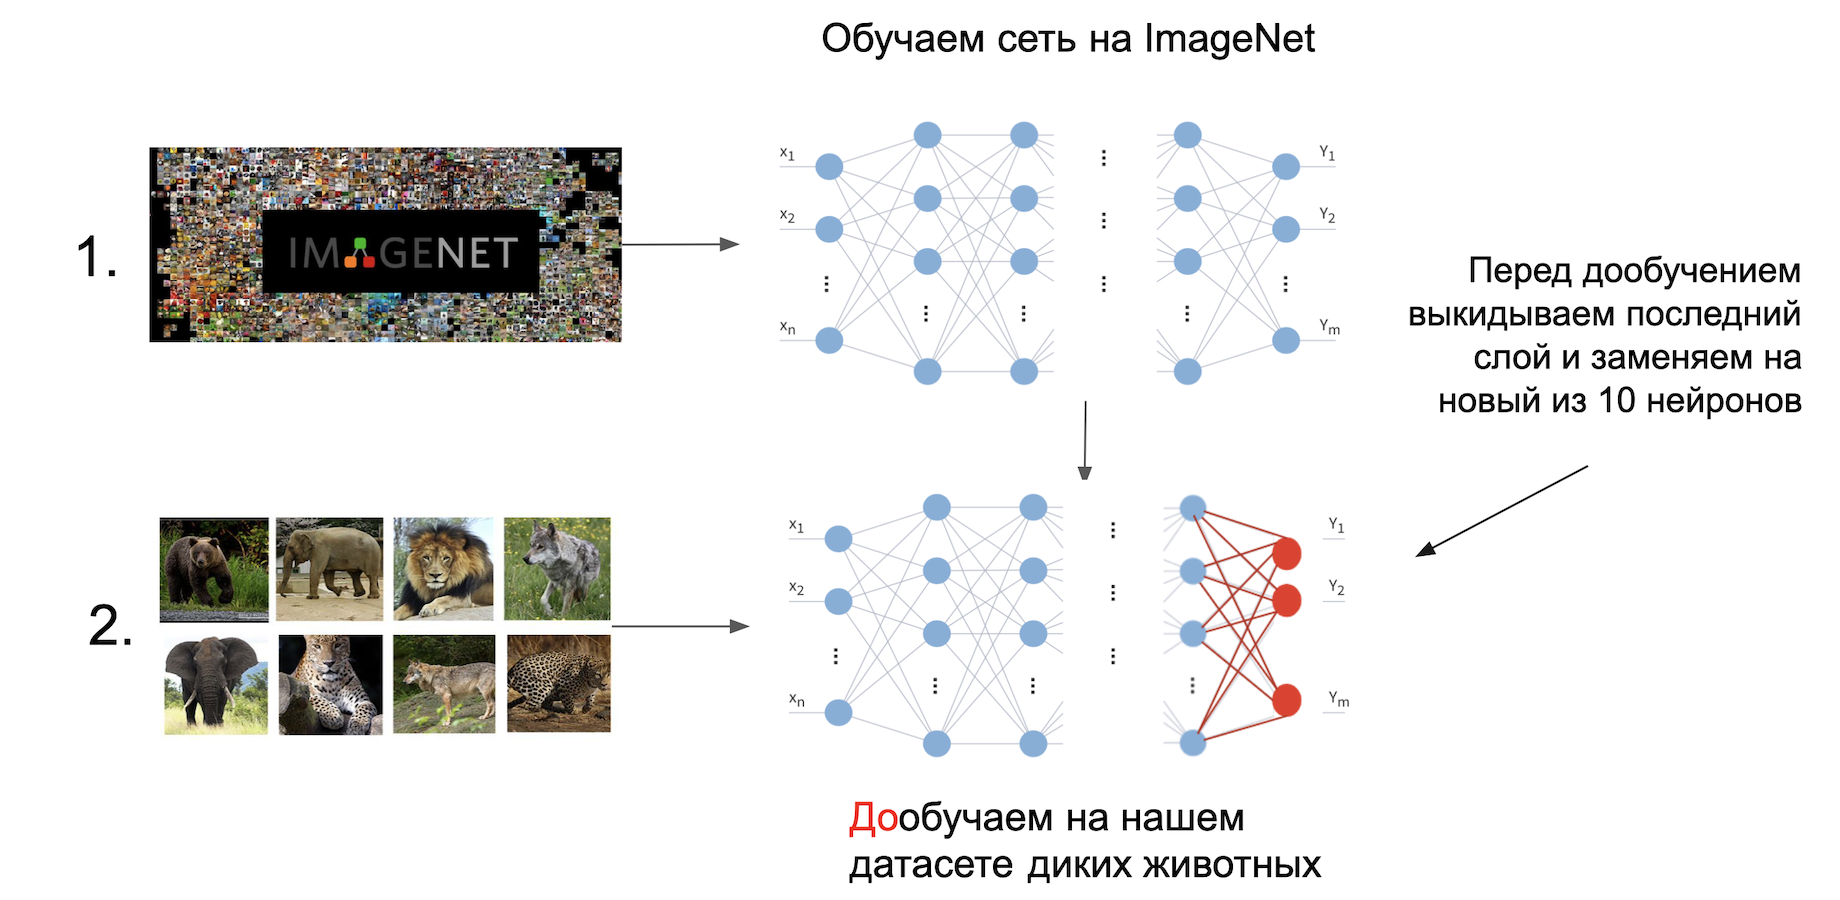

Дообучение практически всегда работает лучше, чем обучение с нуля (при условии, что датасет, на котором вы дообучаете, не богаче датасета, на котором вы предобучаете).

Дообучение работает даже для далеких по семантике датасетов. Например, предобучение на ImageNet и дообучение на датасете зданий тоже отлично работает. 

Иногда перед дообучением сверточных нейросетей заменяют все полносвязные слои. Это связано с тем, что сверточные слои — это слои-выделяторы признаков, а полносвязные слои — слои-классификаторы. Слои-выделяторы признаков при дообучении научились выделять полезные признаки из картинок, которые пригодятся и при дообучении на новом датасете. А слои-классификаторы — это довольно специализированные слои, которые обучаются решать узкую поставленную задачу: классификацию картинок определенного датасета. Поэтому их можно обучить заново под новую задачу, чтобы они по-новому научились сопоставлять признаки, полученные из сверточных слоев, и классы задачи. 

### Заморозка слоев

Иногда, чтобы ускорить обучение нейросети, замораживают несколько начальных слоев предобученной нейросети. 

Почему замораживают именно начальные слои? Мы помним, что при обучении сверточной нейросети начальные слои реагируют на более простые, низкоуровневые паттерны на картинках, а дальние слои — на более высокоуровневые, составные паттерны. Простые паттерны присутствуют практически на всех картинках, какую бы задачу мы ни решали. Поэтому почти вся та информация, которую первые слои нейросети научились выделять в ходе обучения на ImageNet, будет полезна и тогда, когда мы нейросеть будем дообучать на диких животных. А вот последние сверточные слои учились выделять информацию о наличии сложных паттернов, которые были на картинках ImageNet. И они более спецефичны для датасета, на котором сеть оубчалась. Совсем не все из них будут актуальны для классификации диких животных. Поэтому дальние сверточные слои логично дообучить на новом датасете, чтобы они научились выделять те сложные паттерны, которые помогут классифицировать именно диких животных.

Можно сказать, что первые сверточные слои учатся понимать основу, базовую структуру объектов на картинках. И эти знания о базовой структуре объектов мы потом переносим на другую задачу. Нейросети теперь нужно обучаться под задачу классификации диких животных не с нуля: ей только нужно научиться собирать паттерны десяти диких животных из известных ей форм: тех, которые выделяют первые предобученные сверточные слои. 


### Практика

#### Скачивание данных

In [ ]:
# эта ячейка скачивает zip архив с данными 
! wget "https://www.dropbox.com/s/r11z0ugf2mezxvi/dogs.zip?dl=0" -O dogs.zip

In [ ]:
# эта ячейка распаковывает архив. В колабе появится папка ./dogs с данными. 
! unzip -qq dogs.zip 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

In [ ]:
resnet_transforms = transforms.Compose([
        transforms.Resize(256), # размер каждой картинки будет приведен к 256*256
        transforms.CenterCrop(224), # у картинки будет вырезан центральный кусок размера 224*224
        transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # значения пикселей картинки нормализуются
    ])

In [ ]:
train_data = datasets.ImageFolder('./dogs/train', transform=resnet_transforms)
val_data = datasets.ImageFolder('./dogs/valid', transform=resnet_transforms)
test_data = datasets.ImageFolder('./dogs/test', transform=resnet_transforms)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

#### Замена последнего слоя сети

Загрузим модель, которую будем дообучать:

In [ ]:
model = models.resnet18(pretrained=True)
model

In [ ]:
model.fc

Заменим последний слой сети на новый, содержащий 70 нейронов (так как у нас 70 классов в датасете):

In [ ]:
model.fc = nn.Linear(512, 70)
model

#### Заморозка слоев

In [ ]:
len(list(model.children()))

Заморозим все сверточные слои:

In [ ]:
for i, layer in enumerate(model.children()):
  if i < 9:
    for param in layer.parameters():
      param.requires_grad = False

Соберем весь код подготовки вместе:

In [ ]:
def create_model(model, num_freeze_layers, num_out_classes):
    # замена последнего слоя сети
    model.fc = nn.Linear(512, num_out_classes)

    # заморозка слоев
    for i, layer in enumerate(model.children()):
        if i < num_freeze_layers:
            for param in layer.parameters():
                param.requires_grad = False
    
    return model

In [ ]:
model = create_model(models.resnet18(pretrained=True), 9, 70)

#### Обучение сети

Перенесем нашу нейросеть на GPU, если GPU доступен:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
def evaluate(model, dataloader, loss_fn):
    
    losses = []

    num_correct = 0
    num_elements = 0

    for i, batch in enumerate(dataloader):
        
        # так получаем текущий батч
        X_batch, y_batch = batch
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

def train(model, loss_fn, optimizer, n_epoch=3):
    
    # цикл обучения сети
    for epoch in range(n_epoch):

        print("Epoch:", epoch+1)

        model.train(True)
        
        running_losses = []
        running_accuracies = []
        for i, batch in enumerate(train_loader):
            # так получаем текущий батч
            X_batch, y_batch = batch 
            
            # forward pass (получение ответов на батч картинок)
            logits = model(X_batch.to(device)) 
            
            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            loss = loss_fn(logits, y_batch.to(device)) 
            running_losses.append(loss.item())
            
            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети
            optimizer.zero_grad() # обнуляем веса
            
            # вычислим accuracy на текущем train батче
            model_answers = torch.argmax(logits, dim=1)
            train_accuracy = torch.sum(y_batch == model_answers.cpu()) / len(y_batch)
            running_accuracies.append(train_accuracy)

            # Логирование результатов
            if (i+1) % 100 == 0:
                print("Средние train лосс и accuracy на последних 50 итерациях:", 
                      np.mean(running_losses), np.mean(running_accuracies), end='\n')

        # после каждой эпохи получаем метрику качества на валидационной выборке
        model.train(False)

        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn=loss_fn)
        print("Эпоха {}/{}: val лосс и accuracy:".format(epoch+1, n_epoch,), 
                      val_loss, val_accuracy, end='\n')
        
    return model

In [ ]:
# снова объявим модель
model = create_model(models.resnet18(pretrained=True), 9, 70)
model = model.to(device)

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate. 
# вы можете экспериментировать с разными значениями learning_rate
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# запустим обучение модели
# параметр n_epoch можно варьировать
model = train(model, loss_fn, optimizer, n_epoch=3)

#### Получение метрики качества на тестовой выборке

In [ ]:
test_accuracy, _ = evaluate(model, test_loader, loss_fn)
print('Accuracy на тесте', test_accuracy)